In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [3]:
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image

In [4]:
train_datagen= image.ImageDataGenerator(rescale = 1./255, zoom_range= 0.25, shear_range= 0.25)

In [5]:
train_data = train_datagen.flow_from_directory(directory = "../input/chest-xray-pneumonia/chest_xray/train", target_size = (128,128), 
                                               batch_size = 32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [6]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
test_datagen= image.ImageDataGenerator(rescale = 1./255, zoom_range= 0.25, shear_range= 0.25)
test_data = train_datagen.flow_from_directory(directory = "../input/chest-xray-pneumonia/chest_xray/test", target_size = (128,128), 
                                               batch_size = 32, class_mode = 'binary')

Found 624 images belonging to 2 classes.


# CNN

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (128,128, 3), padding='same'))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 512, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 32, activation = 'softmax'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 126, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 64)       

In [25]:
hist = model.fit_generator(train_data, epochs=50,  steps_per_epoch=163, validation_data=test_data, 
                           validation_steps=10, verbose =2, workers=1)

Epoch 1/16
20/20 - 14s - loss: 0.6368 - accuracy: 0.7047 - val_loss: 0.6596 - val_accuracy: 0.6375
Epoch 2/16
20/20 - 13s - loss: 0.6382 - accuracy: 0.7031 - val_loss: 0.6485 - val_accuracy: 0.6625
Epoch 3/16
20/20 - 13s - loss: 0.6158 - accuracy: 0.7469 - val_loss: 0.6584 - val_accuracy: 0.6344
Epoch 4/16
20/20 - 12s - loss: 0.5955 - accuracy: 0.7828 - val_loss: 0.6445 - val_accuracy: 0.6625
Epoch 5/16
20/20 - 13s - loss: 0.6244 - accuracy: 0.7219 - val_loss: 0.6532 - val_accuracy: 0.6469
Epoch 6/16
20/20 - 13s - loss: 0.6208 - accuracy: 0.7297 - val_loss: 0.6696 - val_accuracy: 0.6094
Epoch 7/16
20/20 - 13s - loss: 0.6051 - accuracy: 0.7453 - val_loss: 0.6769 - val_accuracy: 0.5969
Epoch 8/16
20/20 - 13s - loss: 0.6148 - accuracy: 0.7234 - val_loss: 0.6654 - val_accuracy: 0.6187
Epoch 9/16
20/20 - 13s - loss: 0.6103 - accuracy: 0.7328 - val_loss: 0.6476 - val_accuracy: 0.6500
Epoch 10/16
20/20 - 13s - loss: 0.6156 - accuracy: 0.7203 - val_loss: 0.6419 - val_accuracy: 0.6594
Epoch 11/

In [26]:
model.evaluate(test_data)

20/20 [==============================] - 7s 358ms/step - loss: 0.6665 - accuracy: 0.6250


[0.6665282249450684, 0.625]

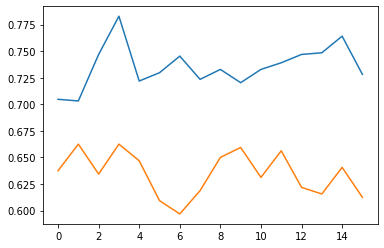

In [27]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')

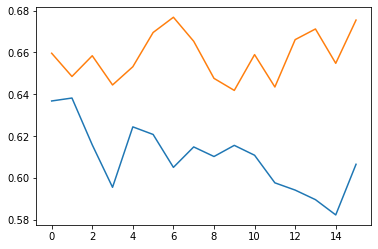

In [28]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')

In [29]:
path ="../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
img = image.load_img(path, target_size=(128,128))


img = image.img_to_array(img)/255
img = np.array([img]) 
img.shape

(1, 128, 128, 3)

In [30]:
model.predict_classes(img)

array([[1]], dtype=int32)